In [1]:
import csv, requests
from io import StringIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/RenzWoo/Data-Science-activities/refs/heads/main/advertisement.json'
response = requests.get(url)
data = response.json()

In [2]:
df = pd.DataFrame(data)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Raw sumary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0.5, 1.0, 'TV distribution')

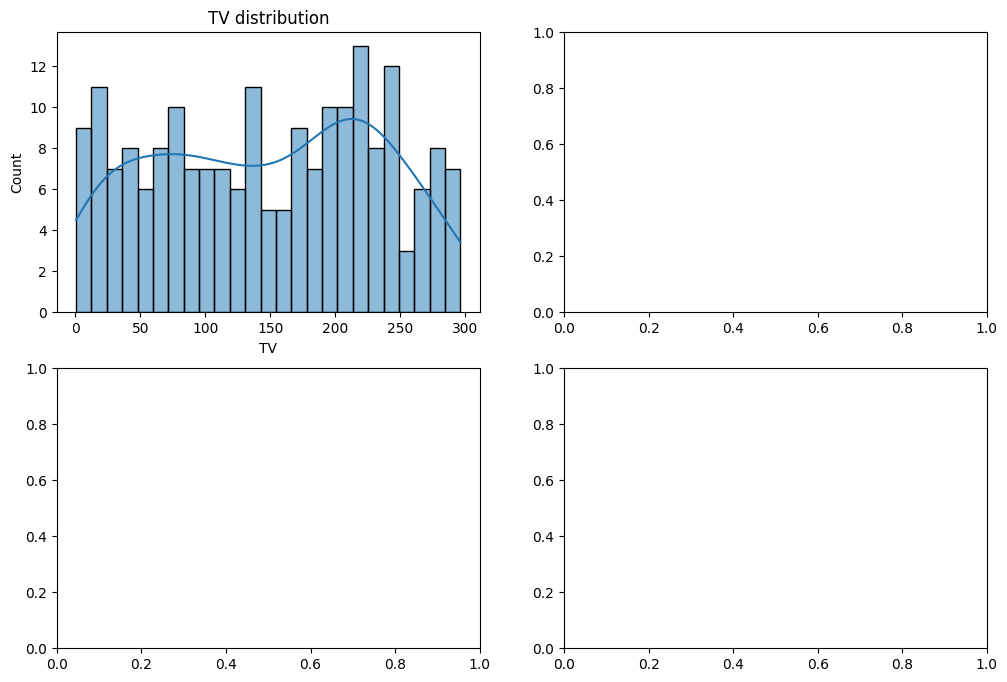

In [22]:
fig, axis = plt.subplots(2,2,figsize=(12,8))

sns.histplot(df['TV'],kde=True, bins=25, ax=axis[0,0])
axis[0,0].set_title("TV distribution")

## Univariate exploration

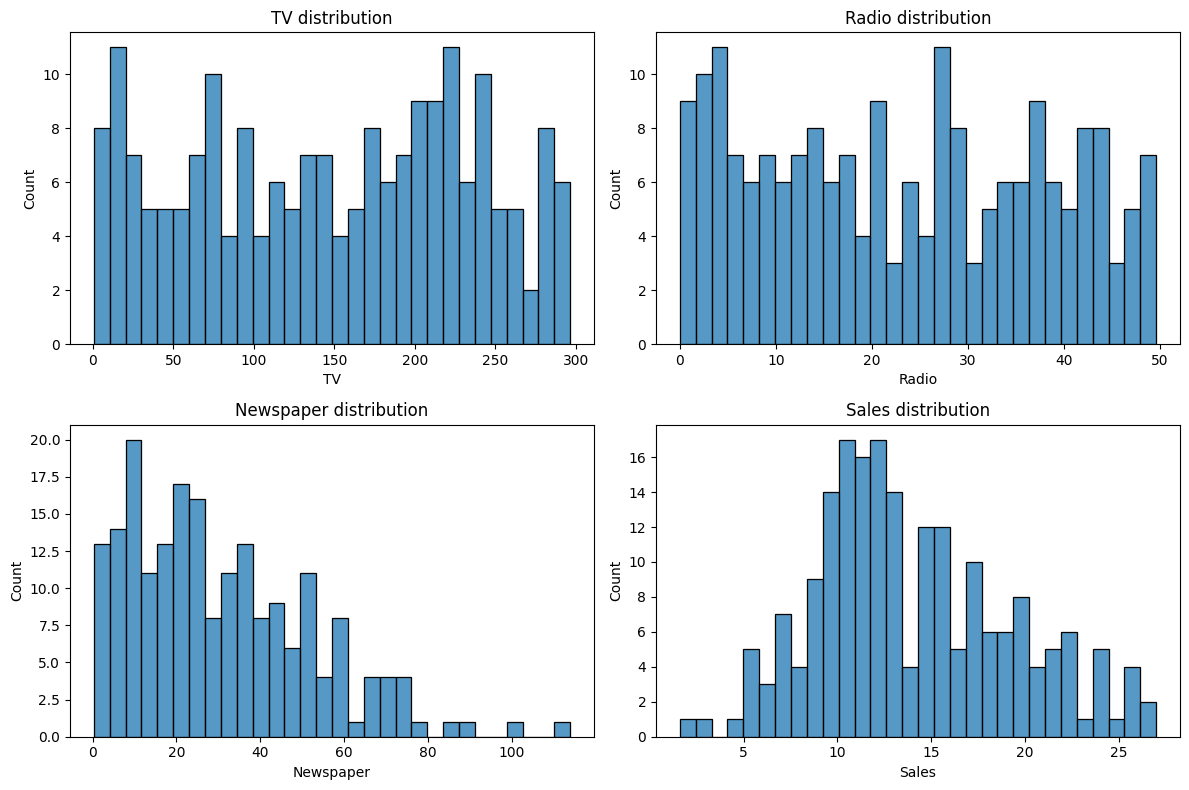

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

n = 30
sns.histplot(df['TV'], bins=n, ax=axes[0, 0])
axes[0, 0].set_title("TV distribution")
sns.histplot(df['Radio'], bins=n, ax=axes[0, 1])
axes[0, 1].set_title("Radio distribution")
sns.histplot(df['Newspaper'], bins=n, ax=axes[1, 0])
axes[1, 0].set_title("Newspaper distribution")

sns.histplot(df['Sales'], bins=n, ax=axes[1, 1])
axes[1, 1].set_title("Sales distribution")

plt.tight_layout()
plt.show()

- **TV distribution:** Fairly evenly spread across the entire range.

- **Radio distribution:** Also spread fairly, but slight tendency for more lower and mid-range values.

- **Newspaper distribution:** Right-skewed (positively skewed), most values are clustered at the lower end.

- **Sales distribution:** Approximately bell-shaped (normal-like) distribution centered around 10–15.

## Bivariate exploration

Heatmap

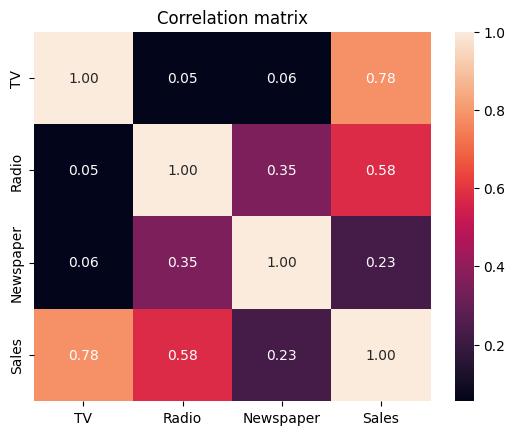

In [63]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

- **TV vs Sales:** Strong positive correlation (~0.78)

- **Radio vs Sales:** Moderate positive correlation (~0.58)

- **Newspaper vs Sales:** Very weak correlation (~0.23)

Pairplot

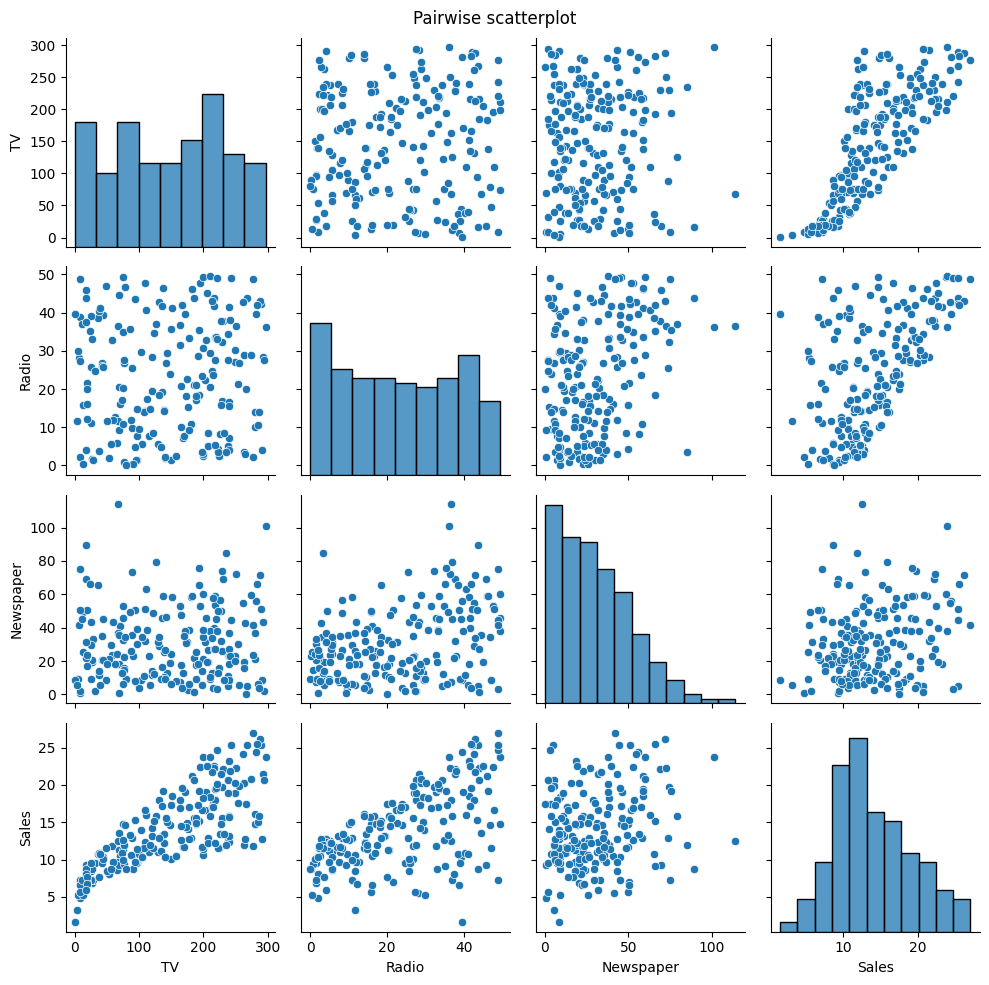

In [46]:
sns.pairplot(df)
plt.suptitle('Pairwise scatterplot')
plt.tight_layout()
plt.show()

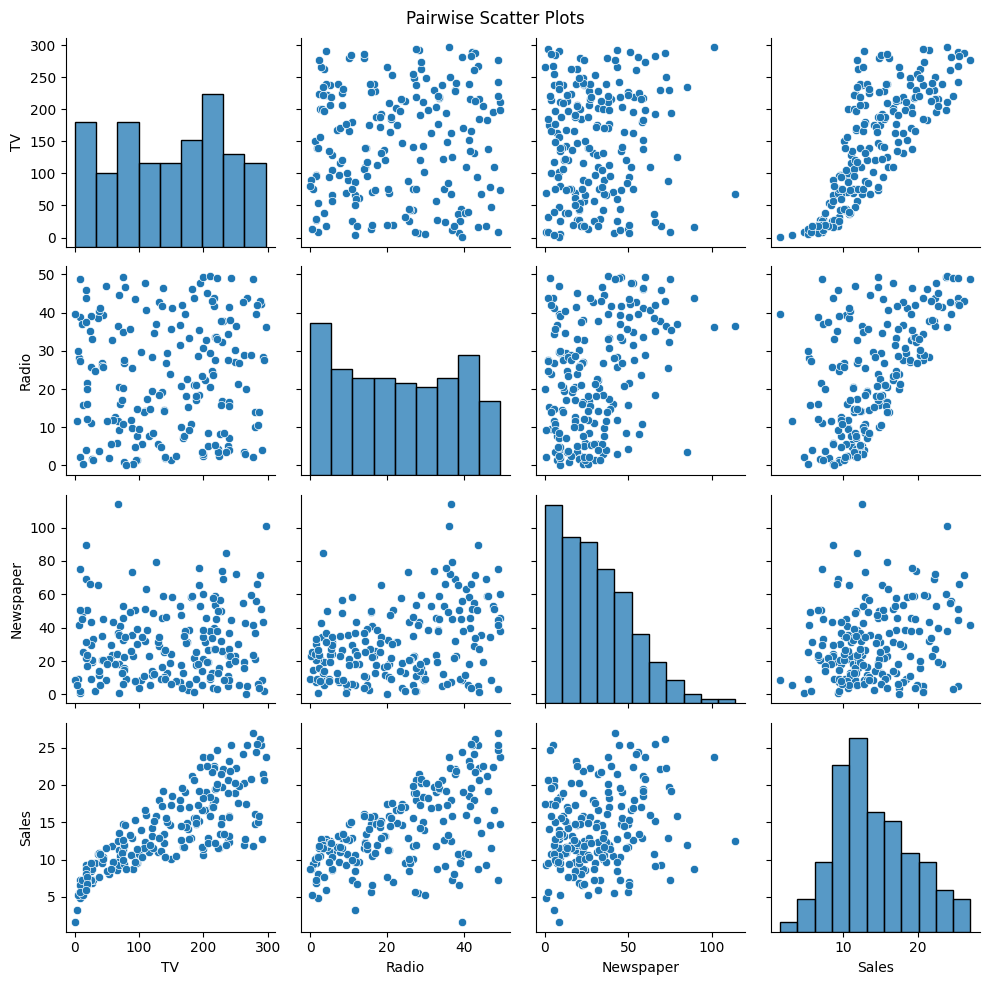

In [41]:
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plots') 
plt.tight_layout()
plt.show()

- **TV–Sales:** Clear linear relationship.

- **Radio–Sales:** Points trend upward but with more scatter (less consistent).

- **Newspaper–Sales:** No clear pattern, data points are scattered randomly.

## Multivariate exploration

3D Scatter (TV vs Radio vs Sales)

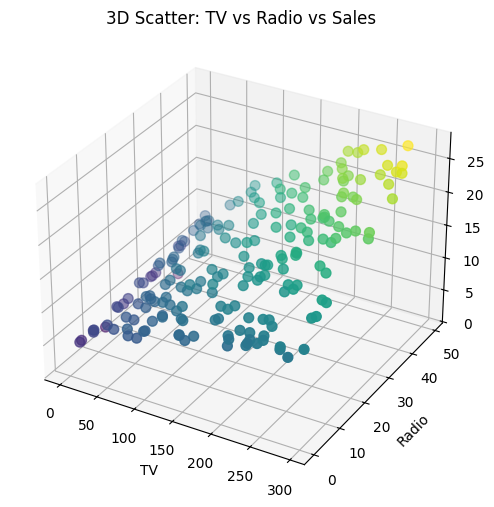

In [74]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TV'], df['Radio'], df['Sales'], c=df['Sales'], s=50)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter: TV vs Radio vs Sales')

plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

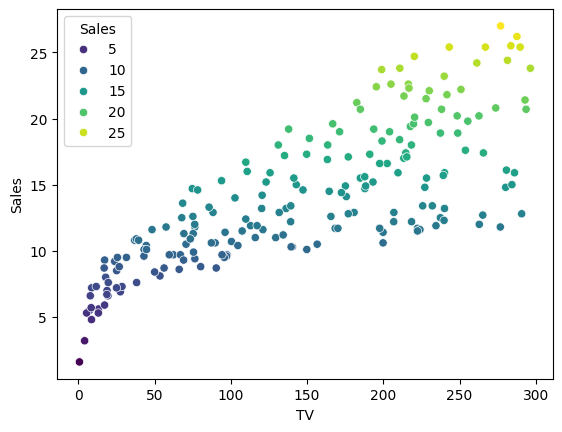

In [55]:
sns.scatterplot(x='TV', y='Sales', data=df, hue='Sales', palette='viridis')

We can see a clear upward trend: when **TV** and **Radio** spending are both high, Sales are also **high**.

Interaction Plot (TV + Radio vs Sales)

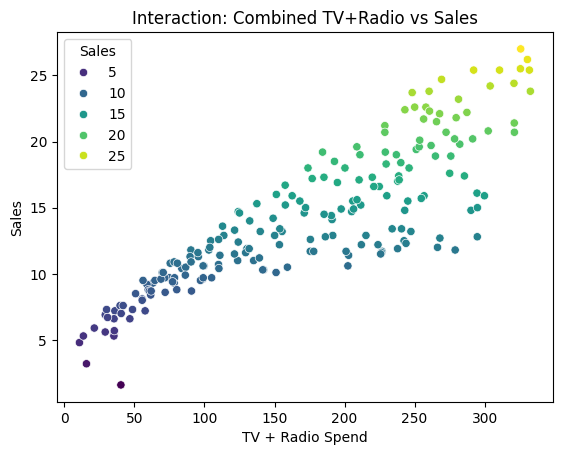

In [47]:
df['TV+Radio'] = df['TV'] + df['Radio']

sns.scatterplot(x='TV+Radio', y='Sales', data=df, hue='Sales', palette='viridis')
plt.title('Interaction: Combined TV+Radio vs Sales')
plt.xlabel('TV + Radio Spend')
plt.ylabel('Sales')
plt.show()

In [52]:
df

,TV,Radio,Newspaper,Sales,TV+Radio
0,230.1,37.8,69.2,22.1,267.9
1,44.5,39.3,45.1,10.4,83.8
2,17.2,45.9,69.3,9.3,63.1
3,151.5,41.3,58.5,18.5,192.8
4,180.8,10.8,58.4,12.9,191.6
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,41.9
196,94.2,4.9,8.1,9.7,99.1
197,177.0,9.3,6.4,12.8,186.3
198,283.6,42.0,66.2,25.5,325.6


As combined spending increases, sales increase almost **linearly** up to a point.

Pairplot (TV, Radio, Newspaper vs Sales)

In [58]:
sns.pairplot(data=df, vars=['TV', 'Radio'])

TypeError: pairplot() missing 1 required positional argument: 'data'

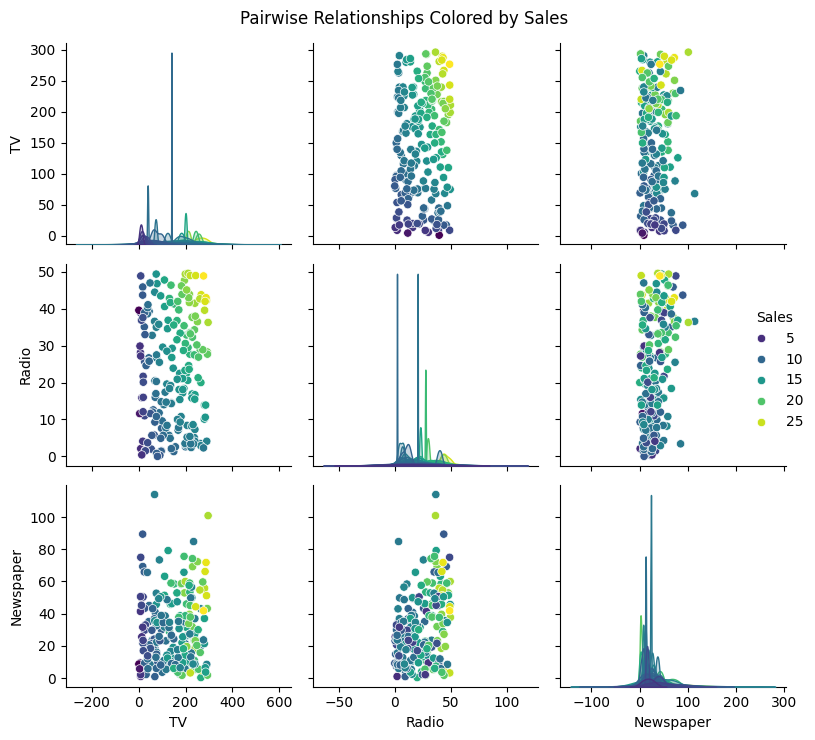

In [54]:
sns.pairplot(df, vars=['TV','Radio','Newspaper'], hue='Sales', palette='viridis')
plt.suptitle('Pairwise Relationships Colored by Sales')
plt.tight_layout()
plt.show()

Points with darker color (higher Sales) are **clustered** at higher **TV** and **Radio** spending.

## Assumptions, interpretations, and thoughts 

### 📌 Univariate Exploration
**Goal:** Understand the distribution of each variable individually.

**What I did:**
- Plotted histograms for `TV`, `Radio`, `Newspaper`, and `Sales`.
- Used 30 bins for better granularity.

**Assumptions:**
- Data is clean and correctly measured.
- Distributions reveal skewness or outliers.

**Interpretation:**
- `TV` and `Radio` appear normally distributed.
- `Newspaper` is slightly right-skewed.
- `Sales` are mostly centered around mid-range values.

**Thoughts:**
- Variables have different ranges and variances — might need scaling later.


### 📌 Bivariate Exploration
**Goal:** Explore relationships between two variables.

**What I did:**
- Computed correlation matrix.
- Created scatter plots of `TV vs Sales`, `Radio vs Sales`, and `Newspaper vs Sales`.

**Assumptions:**
- Relationships might be linear.
- Stronger correlation → more predictive power.

**Interpretation:**
- `TV vs Sales`: Strong positive correlation (~0.78)
- `Radio vs Sales`: Moderate positive correlation (~0.58)
- `Newspaper vs Sales`: Weak correlation (~0.23)

**Thoughts:**
- TV spending is likely the strongest predictor of sales.
- Newspaper might be dropped from future models.


### 📌 Multivariate Exploration
**Goal:** Explore relationships among three or more variables simultaneously.

**What I did:**
- Created a 3D scatter plot (TV, Radio, Sales).
- Created an interaction plot combining TV+Radio vs Sales.
- Colored pairwise plots by Sales intensity.

**Assumptions:**
- Combined effects (interactions) exist between TV and Radio.
- Sales are influenced by more than one variable together.

**Interpretation:**
- High `TV` + `Radio` spending → high `Sales` (synergistic effect).
- `Newspaper` shows no visible interaction with other variables.
- Possible diminishing returns at very high combined spending.

**Thoughts:**
- Strong case for including an interaction term (TV × Radio) in a regression model.
